In [1]:
import numpy as np
import mylibrary.nnlib as tnn

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [25]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
# x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

In [26]:
# linear regression
X = np.c_[x, np.ones(len(x))]
# Y = X@W
W = np.linalg.pinv(X)@y
W

array([ 1.07757568, -0.40514931])

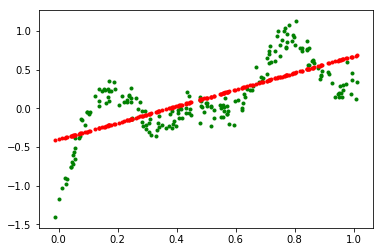

In [27]:
Y = X@W
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')

In [28]:
loss0 = tnn.MseLoss.loss(Y.reshape(yy.shape), yy)
loss0

0.04783191404957956

## Trying for Leaky Relu activation function

In [29]:
class LeakyRelu(tnn.Layer):
    def __init__(self, alpha=0.01, ):
        tnn.layerList.append(self)
        self.x = None
        self.y = None
        self.alpha = alpha

    def forward(self, x):
        self.x = x
        toret = np.maximum(self.alpha * x, x)
        return toret

    def backward(self, y):
        self.y = y
        toret = np.minimum(y/self.alpha, y)
        return toret

### 2 layer network

_______________________
epoch 0
Loss 0.10204841825921285


_______________________
epoch 10
Loss 0.09372419006125784


_______________________
epoch 20
Loss 0.09299386428482294


_______________________
epoch 30
Loss 0.09131362451679166


_______________________
epoch 40
Loss 0.08968028800883139


_______________________
epoch 50
Loss 0.08781483052616686


_______________________
epoch 60
Loss 0.08576115270624284


_______________________
epoch 70
Loss 0.08272077363850425


_______________________
epoch 80
Loss 0.07059870584424983


_______________________
epoch 90
Loss 0.05879724245123148


_______________________
epoch 100
Loss 0.054279208384339465


_______________________
epoch 110
Loss 0.05239902220290695


_______________________
epoch 120
Loss 0.04968948567624909


_______________________
epoch 130
Loss 0.0471014280249956


_______________________
epoch 140
Loss 0.0450168488544924


_______________________
epoch 150
Loss 0.04322116627821751


_______________________
epoch 160
Lo

TclError: invalid command name "pyimage128"

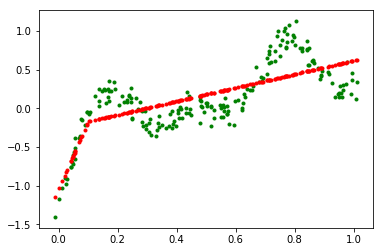

In [30]:
optim = tnn.Adam()
layer1 = tnn.LinearLayer(1,1, optimizer=optim)
layer2 = tnn.LeakyRelu(alpha=0.1)
layer3 = tnn.LinearLayer(1,1, optimizer=optim)
net1 = tnn.AutoForm()
net1.layerList = [layer1, layer2, layer3]

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = net1.forward(xx)
    loss = tnn.MseLoss.loss(a1, yy)
    dy = tnn.MseLoss.del_loss(a1, yy)
    
    dx = net1.backward(dy)
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, a1, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

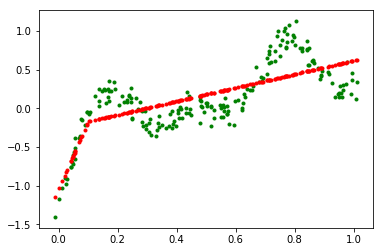

In [31]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1, marker='.', color='r')

In [32]:
loss1 = float(loss)
loss0, loss1

(0.04783191404957956, 0.03658042868356236)

In [33]:
layer1.weights, layer3.weights, layer1.bias, layer3.bias

(array([[-3.45602499]]),
 array([[-2.52976524]]),
 array([0.34573388]),
 array([-0.17256068]))

### 1 layer network

_______________________
epoch 0
Loss 0.4328483063405787


_______________________
epoch 10
Loss 0.36091539432560554


_______________________
epoch 20
Loss 0.30460788614945267


_______________________
epoch 30
Loss 0.26396955723560894


_______________________
epoch 40
Loss 0.23697926512107442


_______________________
epoch 50
Loss 0.22009718144695703


_______________________
epoch 60
Loss 0.20958604616725782


_______________________
epoch 70
Loss 0.2028587080615705


_______________________
epoch 80
Loss 0.19843831070007198


_______________________
epoch 90
Loss 0.1955628694936071


_______________________
epoch 100
Loss 0.1934603672353888


_______________________
epoch 110
Loss 0.19198448413225638


_______________________
epoch 120
Loss 0.1906907230252306


_______________________
epoch 130
Loss 0.18958012621607204


_______________________
epoch 140
Loss 0.18866110173094655


_______________________
epoch 150
Loss 0.18775334111478223


_______________________
epoch 160
Loss 0



_______________________
epoch 1370
Loss 0.052157726164912294


_______________________
epoch 1380
Loss 0.052109256181949275


_______________________
epoch 1390
Loss 0.05208010322727235


_______________________
epoch 1400
Loss 0.05206470467240809


_______________________
epoch 1410
Loss 0.052054388686878034


_______________________
epoch 1420
Loss 0.05204712097151141


_______________________
epoch 1430
Loss 0.052041883574493034


_______________________
epoch 1440
Loss 0.052038050586206544


_______________________
epoch 1450
Loss 0.05203521631841859


_______________________
epoch 1460
Loss 0.05203344237735115


_______________________
epoch 1470
Loss 0.05203295401557554


_______________________
epoch 1480
Loss 0.052032626843419305


_______________________
epoch 1490
Loss 0.0520324762732986


_______________________
epoch 1500
Loss 0.05203242685885854


_______________________
epoch 1510
Loss 0.052032414152989155


_______________________
epoch 1520
Loss 0.05203241017195483




TclError: invalid command name "pyimage148"

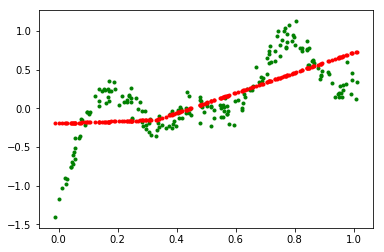

In [34]:
layer1a = tnn.NonLinearLayer(1,1,activation=tnn.LeakyRelu(alpha=0.1),
                             weights=np.array([[-8.5]]),
                             bias=np.array([-0.15]),
                             optimizer=optim)
layer2a = tnn.BiasLayer(1, bias =np.array([-0.1]) ,optimizer=optim)
net2 = tnn.AutoForm()
net2.layerList = [layer1a, layer2a]

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = net2.forward(xx)
    loss = tnn.MseLoss.loss(a1, yy)
    dy = tnn.MseLoss.del_loss(a1, yy)
    
    dx = net2.backward(dy)
    net2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, a1, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [35]:
loss2 = float(loss)
loss0, loss1, loss2

(0.04783191404957956, 0.03658042868356236, 0.052032399761257356)

[ 4.88341604 -3.24095032]


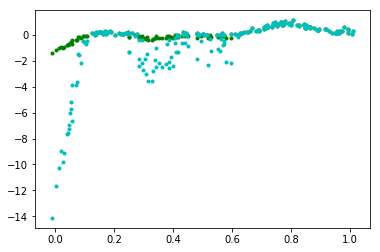

In [36]:
# leaky relu regression
X = np.c_[x, np.ones(len(x))]
# Y = _/ (X@W)
actf = LeakyRelu(alpha=0.1)
# actf = Sigmoid()
#
z = actf.backward(y)
W = np.linalg.pinv(X)@z
print(W)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, z, marker='.', color='c')

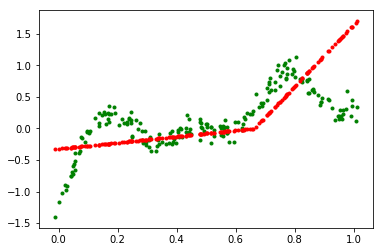

In [37]:
Y = actf.forward(X@W)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')

In [38]:
loss1 = tnn.MseLoss.loss(Y.reshape(yy), yy)
loss1

ValueError: sequence too large; cannot be greater than 32

(0.0468400127123277, 0.09373510788960011, 0.04953877593971923)

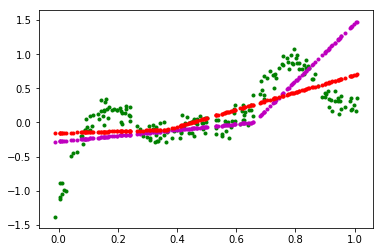

In [23]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='m')
plt.scatter(x, a1, marker='.', color='r')
loss2 = float(np.copy(loss))
loss0, loss1, loss2

In [26]:
print(W)
print(net1.weights, net1.bias)

[ 4.63190426 -3.116093  ]
[[1.42527941]] [-0.68401141]


In [27]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# x_data = torch.from_numpy(xx).float()
# y_data = torch.from_numpy(yy).float()

# # init1 = nn.init.xavier_uniform_
# init2 = nn.init.normal_
# W1 = torch.empty(1,1, requires_grad=True)
# b1 = torch.zeros(1, requires_grad=True)
# b2 = torch.zeros(1, requires_grad=True)
# init2(W1)

# def forward(x):
#     global W1, b1, b2
# #     print(x.shape, W1.shape)
#     x = x.view((-1, 1))
#     z1 = x.mm(W1) + b1
#     a1 = F.leaky_relu(z1)- b2
#     return z1, a1


# params = [W1, b1, b2]
# # optimizer = torch.optim.Adam(params, lr=0.03)
# optimizer = torch.optim.SGD(params, lr=0.03)

# %matplotlib tk
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# plt.ion()
# fig.show()
# fig.canvas.draw()

# for step in range(1000000):
#     z1, a1 = forward(x_data)

#     optimizer.zero_grad()

#     loss_ = F.mse_loss(a1, y_data)
#     loss_.backward()
#     optimizer.step()

#     if step % 1000 == 0:

#         print('_______________________')
#         print("epoch", step)
#         losses = float(loss)
#         print("Loss", losses)


#         ax.clear()
#         plt.scatter(x, y, marker='.', color='g')
#         plt.scatter(x, a1.data.numpy(), marker='.', color='r')
        
#         fig.canvas.draw()
#         plt.pause(0.001)
#         print("\n")
#         if losses < 0.0025:
#             plt.pause(50)
#             break

In [28]:
# print(W)
# print(net1.weights, net1.bias)
# print(W1.data.numpy(), b1.data.numpy())

## recursive gradient for finding target

In [29]:
layer1 = tnn.LinearLayer(1,1, optimizer=tnn.Adam())
layer2=tnn.LeakyRelu(alpha=0.1)
net2 = tnn.AutoForm()
net2.layerList = [layer1, layer2]

In [50]:
z1 = layer1.forward(xx)
z1_ = np.copy(z1)
for i in range(5000):
    a1_ = layer2.forward(z1_)
    dy_ = tnn.MseLoss.del_loss(a1_, yy)
    dz1_ = layer2.backward(dy_)
    z1_ = z1_ - dz1_
tnn.MseLoss.loss(a1_, y)

0.1901150871885391

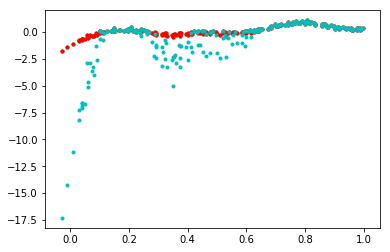

In [51]:
%matplotlib inline
a1_ = layer2.forward(z1_)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='.', color='r')
plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [62]:
# X = np.c_[x, np.ones(len(x))]
# W = np.linalg.pinv(X)@z1_
# print(W)
# Y = layer2.forward(X@W)
# plt.scatter(x, y, marker='.', color='g')
# plt.scatter(x, Y, marker='.', color='r')

for i in range(50000):
    z1 = layer1.forward(xx)    
    dz1_ = tnn.MseLoss.del_loss(z1, z1_)
    layer1.backward(dz1_)
    layer1.update()
a1_ = net2.forward(xx)
loss3 = tnn.MseLoss.loss(a1_, yy)
loss3

0.10035621492172687

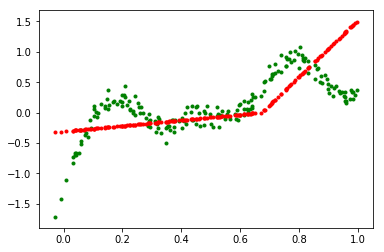

In [63]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1_.reshape(-1), marker='.', color='r')
# plt.scatter(x, z1_.reshape(-1), marker='.', color='c')

In [64]:
loss0, loss1, loss2, loss3

(0.04811614626085529,
 0.10035621492100251,
 0.05422310232701762,
 0.10035621492172687)

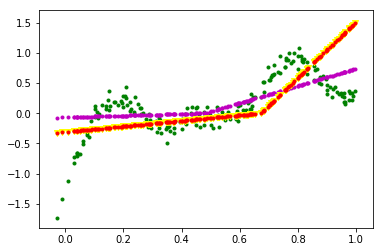

In [72]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1, marker='.', color='m')
plt.scatter(x, Y, marker='v', color='yellow')
plt.scatter(x, a1_, marker='.', color='r')

In [ ]:
# the model can be fit best if the network is formed